In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [25]:
df = pd.read_csv("../data/experimental_results_final.csv", low_memory=False, index_col=0).dropna(subset=["CAD Yield (%)"])

In [26]:
df["selection"].value_counts()

active_learning_2           96
random_1                    95
random_3                    93
test_2                      91
random_4                    90
unexplored                  90
high_yield                  87
active_learning_3           86
random_2                    84
initial_diverse             83
active_learning_1           76
test_1                      70
cores2_test_1               45
cores2_active_learning_1    45
cores2_active_learning_2    44
cores2_test_2               40
test_3                      32
cross_active_learning       30
cross_random                14
Name: selection, dtype: int64

In [27]:
# Core set 1
aryl_smiles = df[df["selection"].isin(["active_learning_1", "active_learning_2", "active_learning_3"])]["smiles_aryl"].unique()
aryl_smiles

array(['CC(C)(C)OC(=O)N1CCC(COc2ccc(Br)cc2)CC1',
       'CCOC(=O)C(=O)CC(=O)c1ccc(Br)cc1', 'O=S(=O)(c1ccc(Br)cc1)N1CCSCC1',
       'CS(=O)(=O)N(c1ccc(Br)cc1)S(C)(=O)=O', 'Cc1cccc(-c2c(F)cccc2Br)c1',
       'COC(=O)c1cc(Br)ccc1OC(F)F',
       'CC(C)(C)OC(=O)N1CCN(c2ccc(Br)cc2Cl)CC1',
       'Cc1nc(-c2ccc(Br)cc2)cs1'], dtype=object)

## Averaged over aryl bromides comparison of mean yields

In [28]:
# Filter to core set 1
df_core_set_1 = df[df["smiles_aryl"].isin(aryl_smiles)].copy()

In [29]:
# Get the average yield for each alkyl bromide average over the aryl bromides 
df_avg_yield_aryl = df_core_set_1.groupby(by=["smiles_alkyl", "selection"])[["CAD Yield (%)"]].agg("mean").reset_index()

In [30]:
df_avg_yield_aryl

,smiles_alkyl,selection,CAD Yield (%)
0,BrC(c1ccccc1)c1ccccn1,random_1,0.000000
1,BrC1C=CCCC1,random_2,0.945034
2,BrC1CCN(Cc2ccccc2)C1,random_2,2.055761
3,BrC1Cc2ccccc21,random_1,20.736346
4,BrCCC1CCCCN1,random_2,13.369276
...,...,...,...
130,O=[N+]([O-])c1cccc(OCCBr)c1,active_learning_3,0.000000
131,OB(O)c1ccc(CBr)c(F)c1,initial_diverse,6.610572
132,OB(O)c1ccc(OCCBr)cc1,initial_diverse,33.224155
133,OC(CCl)CBr,test_2,11.532975


Random selections vs active learning selections comparison with mann whitney u test p-value = 0.0001
Random selections vs random test set comparison with mann whitney u test p-value = 0.4242
Random test set vs active learning selections comparison with mann whitney u test p-value = 0.0077


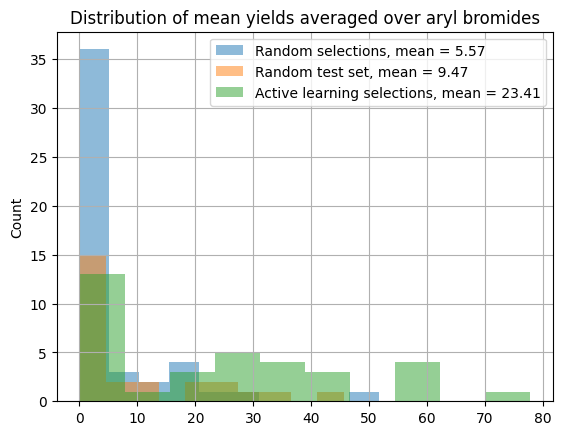

In [31]:
statistical_tests = {
    "comparison": [],
    "p-value": [],
    "statistic": []
    }

random_selections = ["random_1", "random_2", "random_3", "random_4"]
active_learning_selections = ["active_learning_1", "active_learning_2", "active_learning_3"]
random_test_set = ["test_1", "test_2", "test_3"]

# Random selections vs active learning selections comparison
statistic, pvalue = mannwhitneyu(
    x=df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_selections)]["CAD Yield (%)"],
    y=df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(active_learning_selections)]["CAD Yield (%)"],
)
statistic = round(statistic, 4)
pvalue = round(pvalue, 4)
print(f"Random selections vs active learning selections comparison with mann whitney u test p-value = {pvalue}")
statistical_tests["comparison"].append("random_vs_active_learning_selections")
statistical_tests["p-value"].append(pvalue)
statistical_tests["statistic"].append(statistic)

# Random selections vs random test set comparison
statistic, pvalue = mannwhitneyu(
    x=df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_selections)]["CAD Yield (%)"],
    y=df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_test_set)]["CAD Yield (%)"],
    )
statistic = round(statistic, 4)
pvalue = round(pvalue, 4)
print(f"Random selections vs random test set comparison with mann whitney u test p-value = {pvalue}")
statistical_tests["comparison"].append("random_selections_vs_random_test_set")
statistical_tests["p-value"].append(pvalue)
statistical_tests["statistic"].append(statistic)

# Random test set vs active learning selections comparison
statistic, pvalue = mannwhitneyu(
    x=df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_test_set)]["CAD Yield (%)"],
    y=df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(active_learning_selections)]["CAD Yield (%)"],
)
statistic = round(statistic, 4)
pvalue = round(pvalue, 4)
print(f"Random test set vs active learning selections comparison with mann whitney u test p-value = {pvalue}")
statistical_tests["comparison"].append("active_learning_selections_vs_random_test_set")
statistical_tests["p-value"].append(pvalue)
statistical_tests["statistic"].append(statistic)

random_selections_mean = round(df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_selections)]["CAD Yield (%)"].mean(), 2)
random_test_set_mean = round(df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_test_set)]["CAD Yield (%)"].mean(), 2)
active_learning_selections_mean = round(df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(active_learning_selections)]["CAD Yield (%)"].mean(), 2)

df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_selections)]["CAD Yield (%)"].hist(label=f"Random selections, mean = {random_selections_mean}", alpha=0.5)
df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(random_test_set)]["CAD Yield (%)"].hist(label=f"Random test set, mean = {random_test_set_mean}", alpha=0.5)
df_avg_yield_aryl[df_avg_yield_aryl["selection"].isin(active_learning_selections)]["CAD Yield (%)"].hist(label=f"Active learning selections, mean = {active_learning_selections_mean}", alpha=0.5)
plt.legend()
plt.title("Distribution of mean yields averaged over aryl bromides")
plt.ylabel("Count")
plt.show()

statistical_tests_df = pd.DataFrame(statistical_tests)

In [32]:
statistical_tests_df[["comparison", "p-value"]]

,comparison,p-value
0,random_vs_active_learning_selections,0.0001
1,random_selections_vs_random_test_set,0.4242
2,active_learning_selections_vs_random_test_set,0.0077
